## EDA Student Preformance Indicator
1) Problem statement
--> This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
2) Data Collection
-->Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
-->The data consists of 8 column and 1000 rows.
3) Dataset Information
-->gender : sex of students -> (Male/female)
-->race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
-->parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
-->lunch : having lunch before test (standard or free/reduced)
-->test preparation course : complete or not complete before test
-->math score
-->reading score
-->writing score

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Read the dataset
df = pd.read_csv("stud.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,associate's degree,standard,none,69,82,80
1,male,group C,some college,free/reduced,none,63,60,55
2,male,group C,high school,standard,none,92,80,80
3,male,group D,master's degree,standard,completed,56,55,59
4,female,group C,associate's degree,standard,none,71,68,72


In [6]:
df.shape

(1000, 8)

## Data Checks to Perform

-->Check Missing values
-->Check Duplicates
-->Check data type
-->Check the number of unique values of ----->each column
-->Check statistics of data set
-->Check various categories present in the -->different categorical column

In [7]:
#check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Insights or Observation

There is no missing values

In [9]:
df.isna().sum() #same as isnull()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
#check duplicate
df.duplicated().sum()

1

In [17]:
df.drop_duplicates(inplace=True)

In [19]:
# Here we remove duplicate element form dataset
df.duplicated().sum()

0

In [20]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       999 non-null    object
 1   race/ethnicity               999 non-null    object
 2   parental level of education  999 non-null    object
 3   lunch                        999 non-null    object
 4   test preparation course      999 non-null    object
 5   math score                   999 non-null    int64 
 6   reading score                999 non-null    int64 
 7   writing score                999 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 70.2+ KB


In [21]:
# Checkng the number of unique values of each coloums
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     73
reading score                  69
writing score                  73
dtype: int64

In [22]:
# Check the statistics of the dataset 
df.describe()

,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,66.765766,69.619620,68.345345
std,14.735721,14.277084,14.810691
min,21.000000,31.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,67.000000,70.000000,68.000000
75%,77.000000,79.500000,79.000000
max,100.000000,100.000000,100.000000


## Insights or Observation

-->From the above description of numerical data,all means are very close to each other- between 66 and 69

-->All the standard deviation are also close- between 14.27- 14.81

-->While there is a minimum of 21 for maths,other are having 31 and 23 value

In [23]:
# Exploring more info about the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,associate's degree,standard,none,69,82,80
1,male,group C,some college,free/reduced,none,63,60,55
2,male,group C,high school,standard,none,92,80,80
3,male,group D,master's degree,standard,completed,56,55,59
4,female,group C,associate's degree,standard,none,71,68,72


In [24]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group C,master's degree,standard,none,82,83,81
996,male,group D,some college,standard,none,55,61,61
997,male,group E,some high school,standard,completed,92,88,82
998,male,group E,some high school,standard,none,80,60,59
999,female,group B,bachelor's degree,standard,none,79,86,83


In [26]:
[feature for feature in df.columns if df[feature].dtype!='O']

['math score', 'reading score', 'writing score']

In [27]:
## segrregate numerical and categorical feature 
numerical_feature = [feature for feature in df.columns if df[feature].dtype!='O']
caterogical_feature = [feature for feature in df.columns if df[feature].dtype=='O']

In [28]:
numerical_feature

['math score', 'reading score', 'writing score']

In [29]:
caterogical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [31]:
df['gender'].value_counts()

female    512
male      487
Name: gender, dtype: int64

In [32]:
df['lunch'].value_counts()

standard        659
free/reduced    340
Name: lunch, dtype: int64

In [33]:
# Aggregate the total score with mean

df['total_score']= (df['math score']+df['reading score']+df['writing score'])
df['average']= df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group C,associate's degree,standard,none,69,82,80,231,77.000000
1,male,group C,some college,free/reduced,none,63,60,55,178,59.333333
2,male,group C,high school,standard,none,92,80,80,252,84.000000
3,male,group D,master's degree,standard,completed,56,55,59,170,56.666667
4,female,group C,associate's degree,standard,none,71,68,72,211,70.333333


<AxesSubplot: xlabel='average', ylabel='Count'>

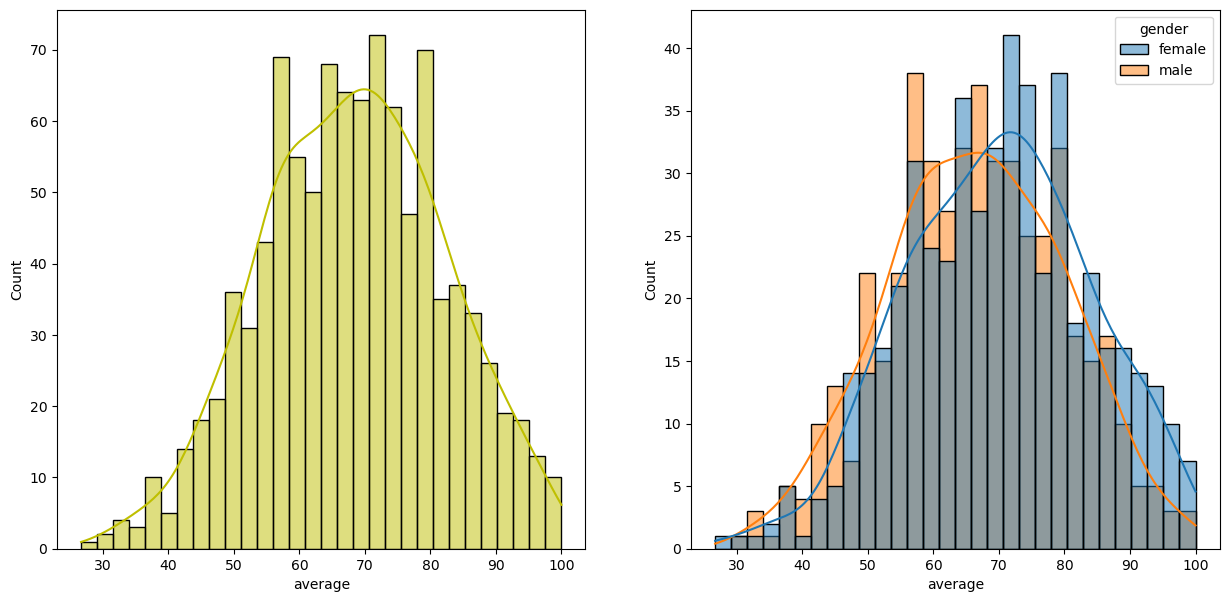

In [42]:
## we will be exploring more visualization
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='y')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')

## Insights

-->Female students tend to perform well than male students

<AxesSubplot: xlabel='average', ylabel='Count'>

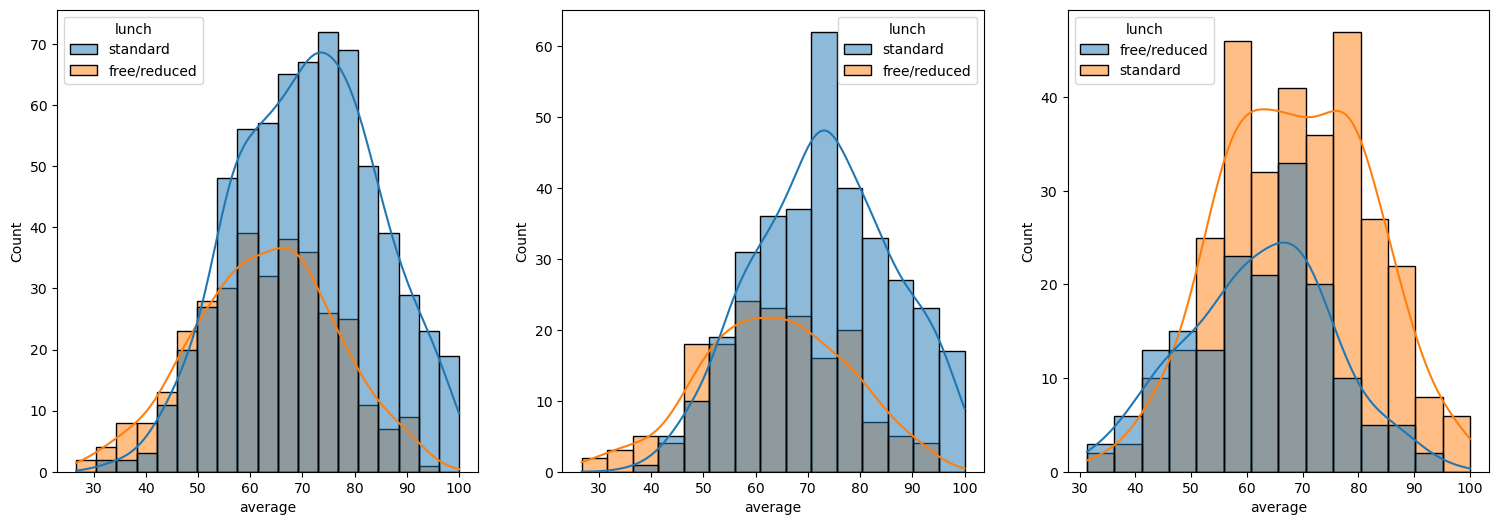

In [46]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

In [47]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group C,associate's degree,standard,none,69,82,80,231,77.000000
1,male,group C,some college,free/reduced,none,63,60,55,178,59.333333
2,male,group C,high school,standard,none,92,80,80,252,84.000000
3,male,group D,master's degree,standard,completed,56,55,59,170,56.666667
4,female,group C,associate's degree,standard,none,71,68,72,211,70.333333


## Insights

- Standard Lunch help students perform well in exams
- Standard lunch helps perform well in exams be it a male of female

<AxesSubplot: xlabel='average', ylabel='Count'>

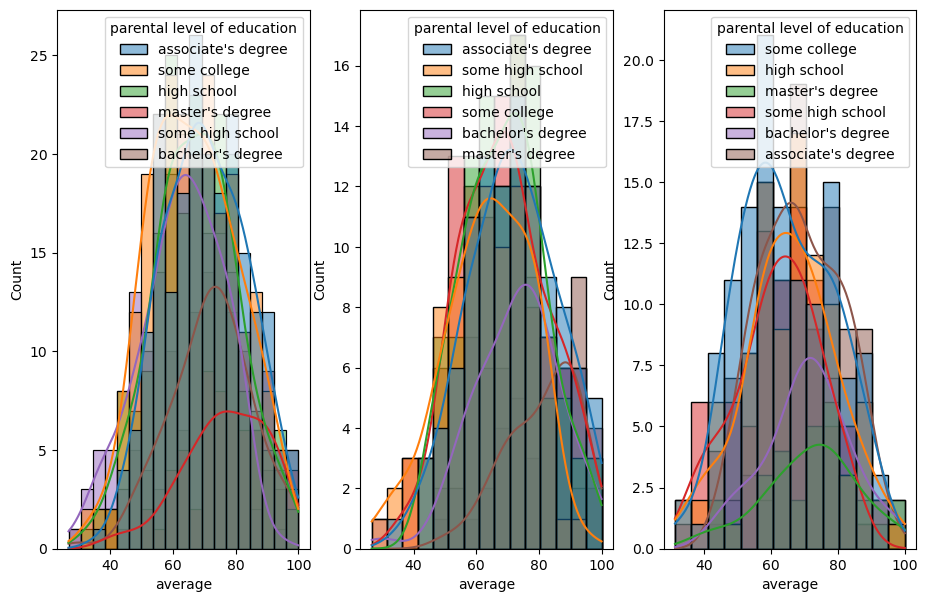

In [48]:
fig,axis=plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')

## Insights
-In general parent's education don't help student perform well in exam.

-3rd plot shows that parent's whose education is of bachelor's degree or master's degree their male child tend to perform well in exam

-2nd plot we can see there is no effect of parent's education on female students.

<AxesSubplot: xlabel='average', ylabel='Count'>

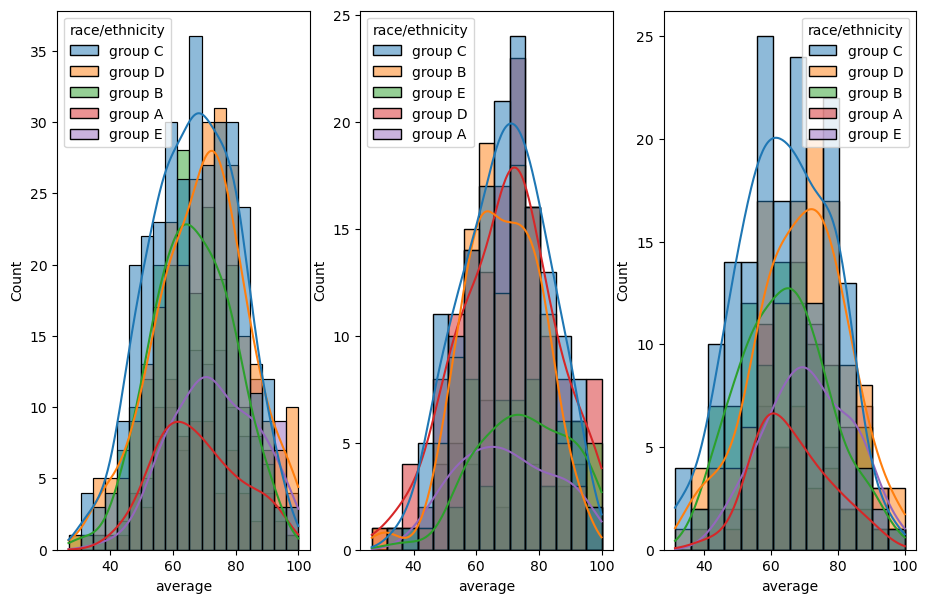

In [49]:
fig,axis=plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')

## Insights

-->Students of group A and group B tends to perform poorly in exam.

-->Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

<AxesSubplot: >

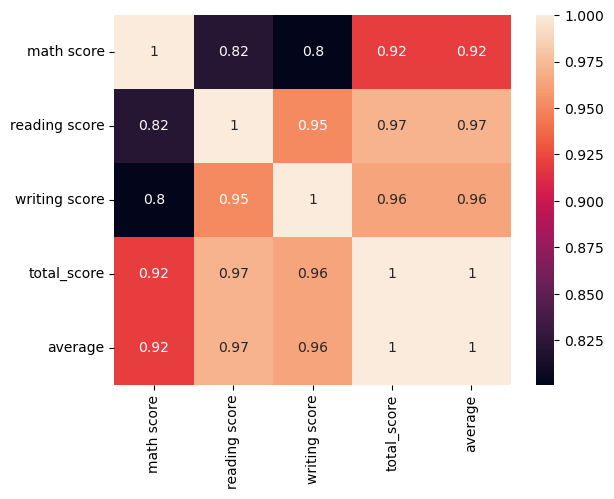

In [50]:
sns.heatmap(df.corr(),annot=True)